# Image_preprocessing.ipynb 說明
本 notebook 主要介紹影像前處理（Image Preprocessing）的基本理論與實作。內容重點如下：
1. **影像讀取與顯示**：說明如何用 OpenCV 讀取與顯示圖片。
2. **影像模糊化**：介紹高斯模糊的原理，並用 OpenCV 與自訂 kernel 實作模糊效果。
3. **影像銳利化**：說明銳利化的原理，並用自訂 kernel 實作。
4. **邊緣偵測**：介紹 Sobel 邊緣偵測器，並分別偵測水平與垂直邊緣。
5. **程式碼練習區**：提供完整程式碼範例，讓學生能動手操作並觀察各種前處理效果。
本 notebook 適合用於電腦視覺入門教學，幫助學習者理解影像前處理的基本技巧與原理，為後續影像分析與深度學習任務打下基礎。

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 上傳圖片

In [3]:
Lenna_img = cv2.imread('./data/Lenna.jpg')
print(Lenna_img.shape)

(512, 512, 3)


# 圖像模糊化

https://setosa.io/ev/image-kernels/

## 使用opencv套件來實作高斯模糊

Text(0.5, 1.0, 'Gaussian Blur Image')

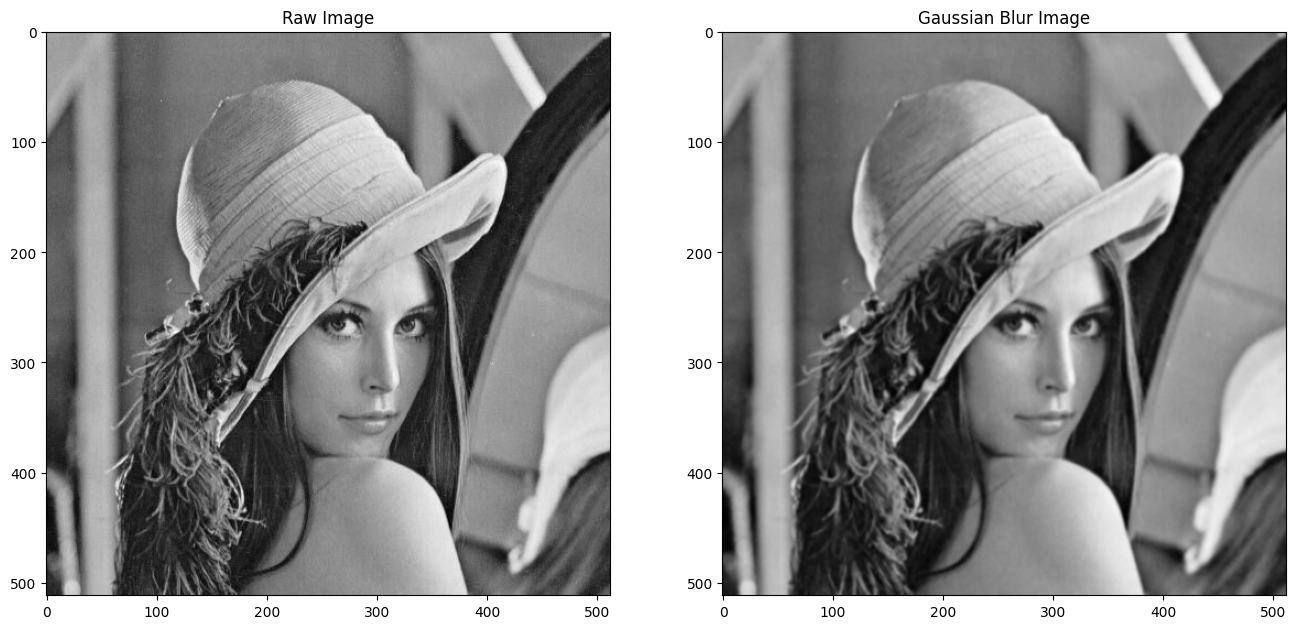

In [4]:
Img = cv2.imread('./data/Lenna.jpg') #讀取圖片
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY) #將圖片轉為灰階，單純好解釋高斯模糊
GaussianImg = cv2.GaussianBlur(Img,(5,5),0)         #opencv高斯模糊

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(Img,cmap='gray')
plt.title("Raw Image")

plt.subplot(1,2,2)
plt.imshow(GaussianImg,cmap='gray')
plt.title("Gaussian Blur Image")

## 使用高斯kernel來實作高斯模糊

Text(0.5, 1.0, 'Gaussian Blur Image')

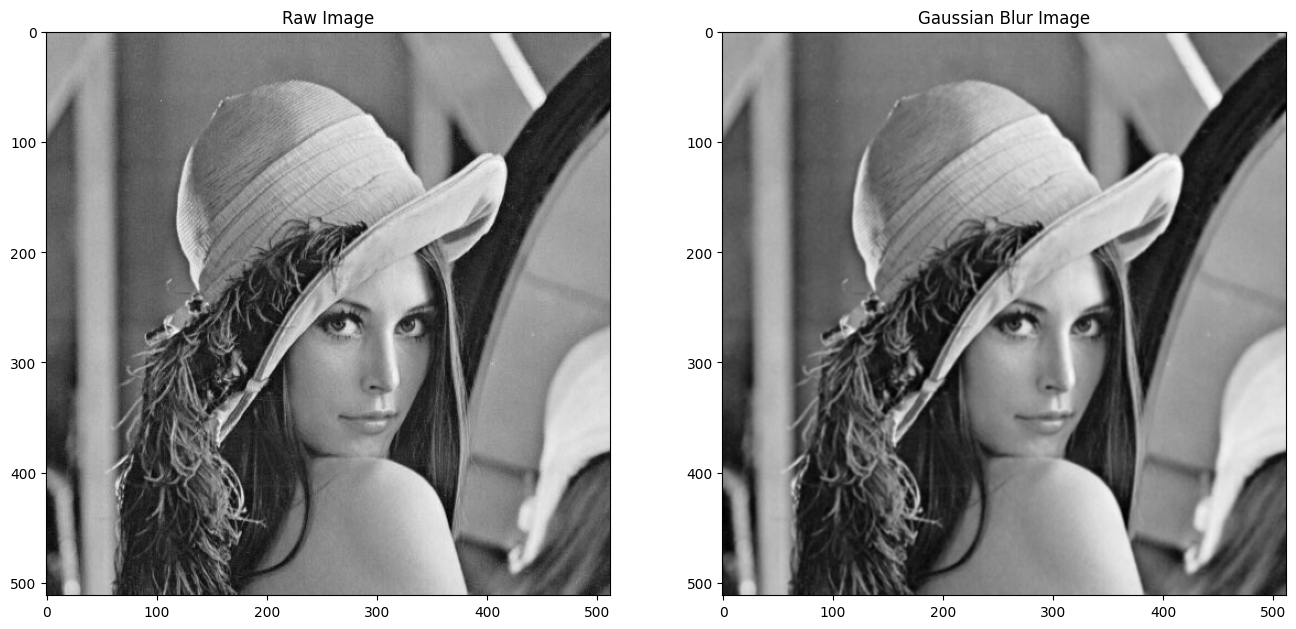

In [5]:
def BlurImg(img):
  kernel = np.array([[1,2,1], 
                     [2,4,2], 
                     [1,2,1]])
  
  im = cv2.filter2D(img, -1, kernel,cv2.BORDER_DEFAULT) #BORDER_DEFAULT邊界填充方式，跟著邊界的value做填充
  im = im / 16
  return im

Img = cv2.imread('./data/Lenna.jpg') #讀取圖片
#Img = cv2.imread('/home/twsaubx657/INNOLUX tech/CNN1/src_1. CV/data/Lenna.jpg') #讀取圖片
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY) #將圖片轉為灰階，單純好解釋高斯模糊
# 57988/view/INNOLUX%20tech/CNN1/src_1.%20CV/data/Lenna.jpg
# /home/twsaubx657/INNOLUX tech/CNN1/src_1.%20CV/data/Lenna.jpg

Img = Img / 255.0                  #先將圖片rescale到0 - 1 之間，避免圖像因為卷積後數值超過255
GaussianImg = BlurImg(Img)         #高斯模糊

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(Img,cmap='gray')
plt.title("Raw Image")

plt.subplot(1,2,2)
plt.imshow(GaussianImg,cmap='gray')
plt.title("Gaussian Blur Image")

In [5]:
# import os

# file_path = '/home/twsaubx657/INNOLUX tech/CNN1/src_1. CV/data/Lenna.jpg'
# print(os.path.exists(file_path))  # 這應該返回 True

# 圖像銳利化

Text(0.5, 1.0, 'SharpenImg Image')

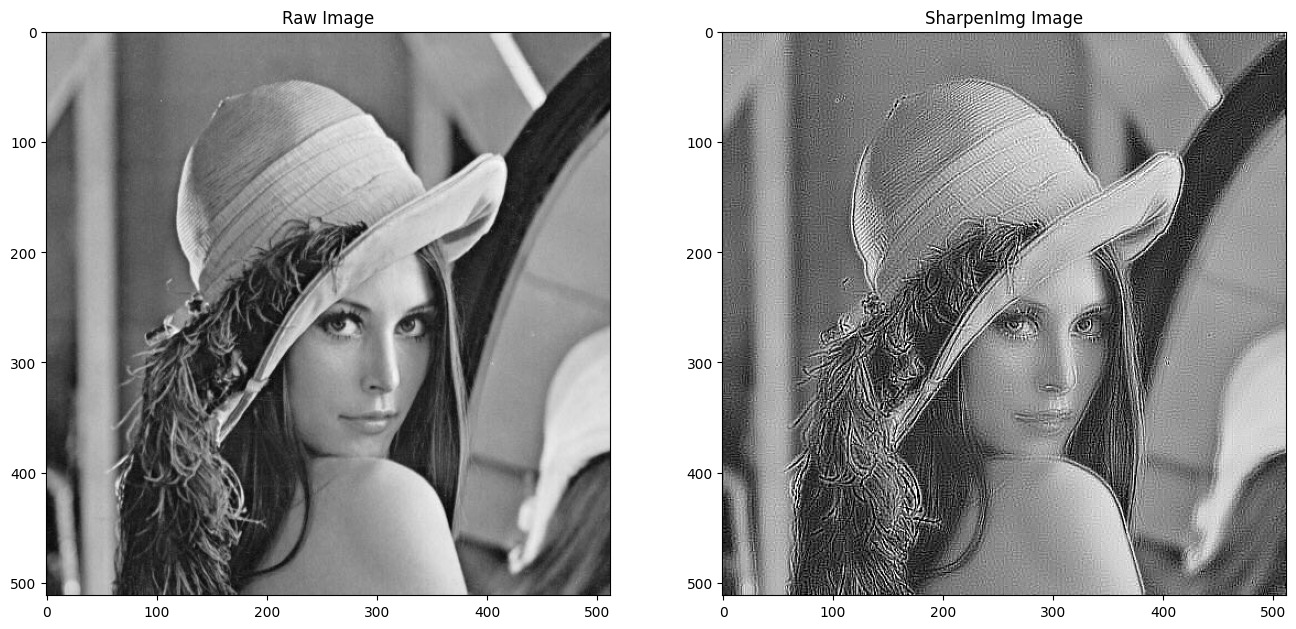

In [6]:
def SharpImg(img):
  kernel = np.array([[1,1,1], 
                    [1,-7,1], 
                    [1,1,1]])

  im = cv2.filter2D(img, -1, kernel)
  return im

Img = cv2.imread('./data/Lenna.jpg') #讀取圖片
#Img = cv2.imread('/home/twsaubx657/INNOLUX tech/CNN1/src_1. CV/data/Lenna.jpg') #讀取圖片
Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY) #將圖片轉為灰階，單純好解釋銳利化
SharpenImg = SharpImg(Img)         #銳利化

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.imshow(Img,cmap='gray')
plt.title("Raw Image")

plt.subplot(1,2,2)
plt.imshow(SharpenImg,cmap='gray')
plt.title("SharpenImg Image")

那又如何找到水平或垂直的邊緣線呢?

Text(0.5, 1.0, 'Vertical')

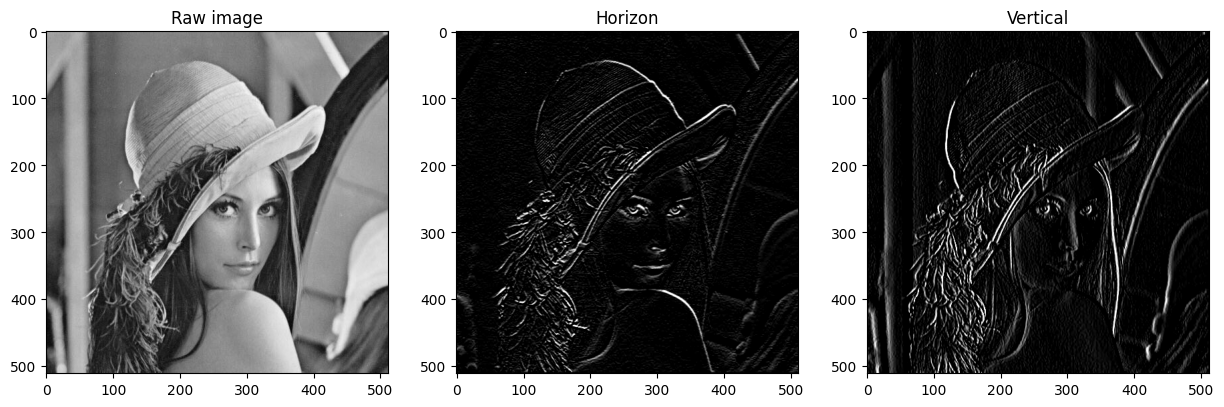

In [8]:
def Sobel(img,FindHorizon = True):
    if FindHorizon:
       #可以有效地看到水平方向的邊緣，因為垂直方向的點會被相減掉，但是水平方向的pixel會被放大
        kernel = np.array([[-1,-2,-1], 
              [0, 0, 0], 
              [1, 2, 1]])
    else:
        kernel = np.array([[-1, 0, 1], 
              [-2, 0, 2], 
              [-1, 0, 1]])
    
    im = cv2.filter2D(img, -1, kernel)

    return im

Img = cv2.imread('./data/Lenna.jpg') #讀取圖片
#Img = cv2.imread('/home/twsaubx657/INNOLUX tech/CNN1/src_1. CV/data/Lenna.jpg') #讀取圖片
SquareImg = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)

FindhorizonImg = Sobel(SquareImg,True)   #使用水平filter來去尋找水平特徵
FindverticalImg = Sobel(SquareImg,False)  #使用垂直filter來去尋找垂直特徵

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(SquareImg,cmap='gray')
plt.title('Raw image')

plt.subplot(1, 3, 2)
plt.imshow(FindhorizonImg,cmap = 'gray')
plt.title('Horizon')

plt.subplot(1, 3, 3)
plt.imshow(FindverticalImg,cmap='gray')
plt.title('Vertical')

https://chatgpt.com/share/65b7b599-ed98-4299-88bc-ee7cddb30b79